
Target Label Mapping:
Numerical Label 0 maps to original class: Bacteria
Numerical Label 1 maps to original class: Human
Numerical Label 2 maps to original class: Plant
Numerical Label 3 maps to original class: Virus
--------------------------------------------------

--- Checking for Missing Values in Dataset ---
No missing values detected in the dataset.
--------------------------------------------------
Data loaded successfully.
--------------------------------------------------
Total Samples: 3000

--- Class Distribution Analysis ---
Class Label         Count     Percentage
----------------------------------------
Bacteria            761       25.37%
Human               749       24.97%
Plant               747       24.90%
Virus               743       24.77%
----------------------------------------


/var/folders/p2/1tndspj10mn6kw0xmgg6gtk40000gn/T/ipykernel_15682/1438356768.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


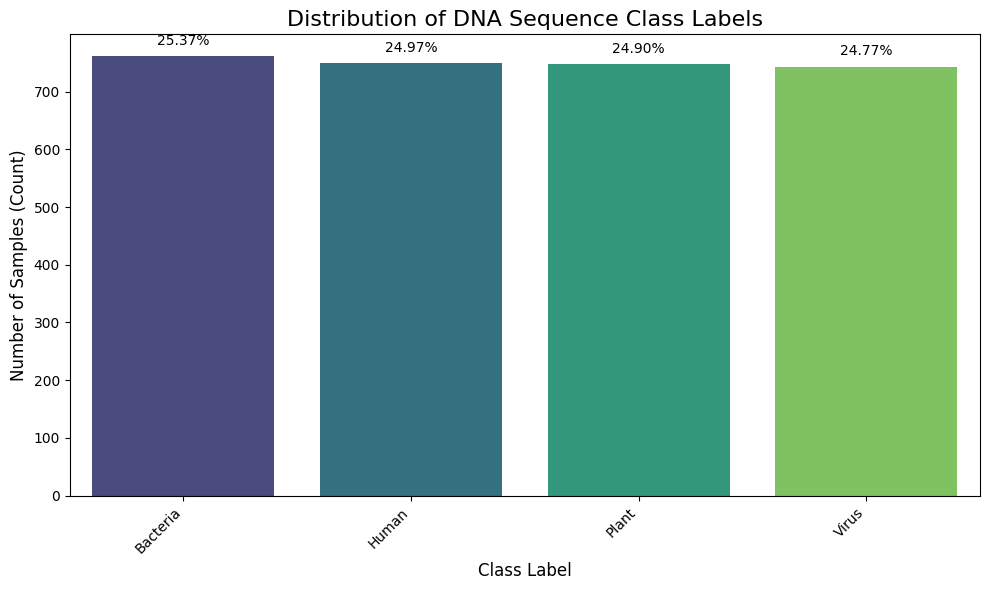


Class distribution check complete. Visualization displayed.

--- Generating Feature Correlation Heatmap ---


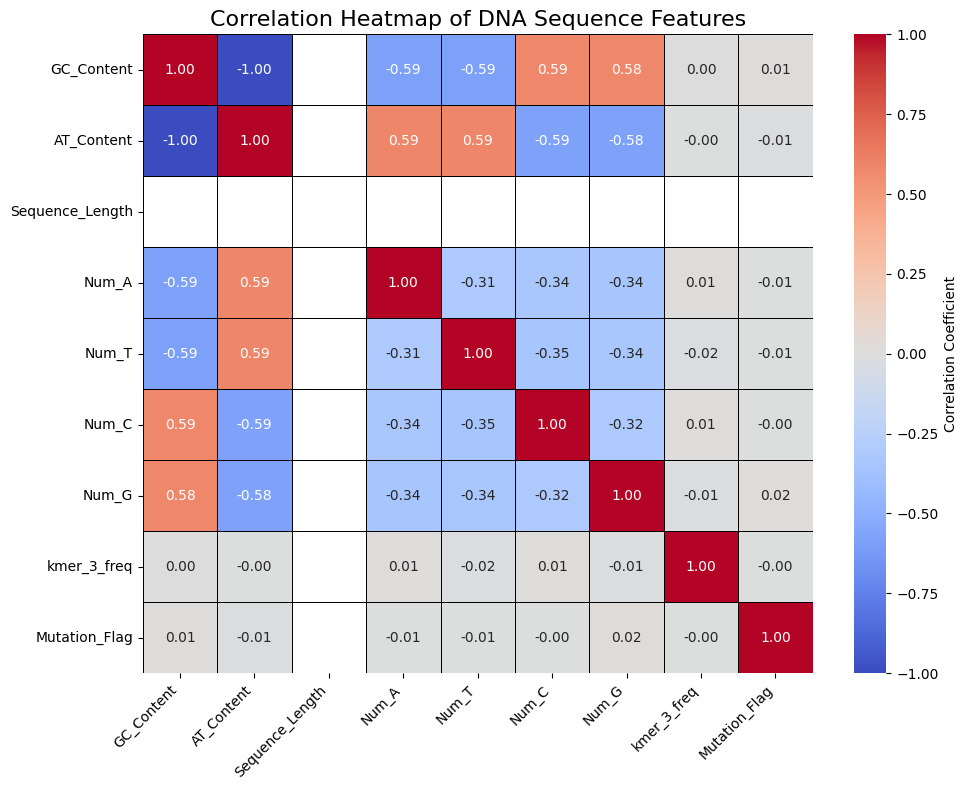

Starting 5-Fold Cross-Validation for model comparison...
All 8 numerical features are being used (No Feature Selection).
Model: Random Forest
  CV Scores: [0.26666667 0.255      0.26333333 0.25166667 0.28666667]
  Mean Accuracy: 0.2647
----------------------------------------------------------------------
Model: SVM (RBF Kernel)
  CV Scores: [0.25333333 0.23333333 0.24       0.25       0.25      ]
  Mean Accuracy: 0.2453
----------------------------------------------------------------------
Model: Logistic Regression
  CV Scores: [0.26       0.265      0.26       0.24666667 0.24666667]
  Mean Accuracy: 0.2557
----------------------------------------------------------------------
Model: K-Nearest Neighbors
  CV Scores: [0.275      0.265      0.24666667 0.26166667 0.275     ]
  Mean Accuracy: 0.2647
----------------------------------------------------------------------



FINAL MODEL COMPARISON (5-Fold CV Accuracy)
Model Name               Mean CV Accuracy    Std. Dev. 
-----------------

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder # <-- Added LabelEncoder
from sklearn.pipeline import Pipeline

df = pd.read_csv('synthetic_dna_dataset.csv')
df.head()#  2. Preprocess the Data: Feature and Target Selection

# MODIFIED TARGET COLUMN to 'Class_Label' (Multi-Class)
TARGET_COLUMN = 'Class_Label'
FEATURE_COLUMNS = [
    'GC_Content', 'AT_Content', 'Sequence_Length',
    'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag'
]


if not all(col in df.columns for col in FEATURE_COLUMNS + [TARGET_COLUMN]):
    print("Error: Required feature or target columns not found in the dataset.")
    print(f"Expected columns: {FEATURE_COLUMNS + [TARGET_COLUMN]}")
    exit()


X = df[FEATURE_COLUMNS]
y_string = df[TARGET_COLUMN] # Hold the original string labels

# --- Preprocessing for Multi-Class Target ---
# ML models require numerical labels (0, 1, 2...) for classification,
# so we must encode the string 'Class_Label' values (e.g., 'Bacteria', 'Virus').
le = LabelEncoder()
y = le.fit_transform(y_string) # y now contains numerical labels

# Report the mapping for clarity
print("\nTarget Label Mapping:")
for i, label in enumerate(le.classes_):
    print(f"Numerical Label {i} maps to original class: {label}")
print("-" * 50)


# --- Check for Missing Values ---
print("\n--- Checking for Missing Values in Dataset ---")
missing_values = df.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    for col, count in missing_values.items():
        if count > 0:
            print(f"  {col}: {count} missing values")
else:
    print("No missing values detected in the dataset.")
print("-" * 50)# class_balance_check.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
try:
    df = pd.read_csv('synthetic_dna_dataset.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'synthetic_dna_dataset.csv' not found. Ensure it is in the same directory.")
    exit()

# Define the target column
TARGET_COLUMN = 'Class_Label'
print("-" * 50)


# --- 2. Calculate Class Frequencies ---


class_counts = df[TARGET_COLUMN].value_counts()
total_samples = class_counts.sum()


class_percentages = (class_counts / total_samples) * 100

print(f"Total Samples: {total_samples}")
print("\n--- Class Distribution Analysis ---")


print(f"{'Class Label':<20}{'Count':<10}{'Percentage':<10}")
print("-" * 40)
for label, count in class_counts.items():
    percent = class_percentages[label]
    print(f"{label:<20}{count:<10}{percent:.2f}%")
print("-" * 40)


# --- 3. Visualize Class Distribution ---

plt.figure(figsize=(10, 6))

sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette='viridis'
)


plt.title('Distribution of DNA Sequence Class Labels', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')


for i, count in enumerate(class_counts.values):
    plt.text(
        i,
        count + 20, # Position the text slightly above the bar
        f'{class_percentages.iloc[i]:.2f}%',
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

print("\nClass distribution check complete. Visualization displayed.")
#  2. Feature Correlation Heatmap (EDA Component)

print("\n--- Generating Feature Correlation Heatmap ---")


import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show the correlation values on the map
    fmt=".2f",               # Format the values to 2 decimal places
    cmap='coolwarm',         # Color map (cool to warm colors)
    linewidths=.5,           # Add lines to separate cells
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'} # Label the color bar
)
plt.title('Correlation Heatmap of DNA Sequence Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


print("=" * 70)# K-Fold Cross-Validation Model Comparison


import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Import Support Vector Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # Import K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

K_FOLDS = 5
RANDOM_SEED = 42


MODEL_COMPARISON_LIST = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)),
    ("SVM (RBF Kernel)", SVC(kernel='rbf', random_state=RANDOM_SEED, gamma='auto')),
    ("Logistic Regression", LogisticRegression(random_state=RANDOM_SEED, max_iter=1000, multi_class='ovr')),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
]

# --- 3. Setup Cross-Validation Strategy ---
cv = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_SEED)
print(f"Starting {K_FOLDS}-Fold Cross-Validation for model comparison...")
print("All 8 numerical features are being used (No Feature Selection).")
print("=" * 70)

results = []

# --- 4. K-Fold Cross-Validation Loop ---
for name, model in MODEL_COMPARISON_LIST:

    # Define the processing pipeline: Scaling -> Model (No feature selection)
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Step 1: Feature Scaling
        ('model', model)             # Step 2: The Classification Model
    ])

    try:
        # Calculate cross-validation scores using the pipeline
        scores = cross_val_score(
            pipeline,
            X,
            y,
            cv=cv,
            scoring='accuracy',
            n_jobs=-1 # Use all available processors
        )

        mean_score = scores.mean()
        std_score = scores.std()
        results.append((name, mean_score, std_score))

        print(f"Model: {name}")
        print(f"  CV Scores: {scores}")
        print(f"  Mean Accuracy: {mean_score:.4f}")
        print("-" * 70)

    except Exception as e:
        print(f"An error occurred during CV for {name}: {e}")
        print("-" * 70)# --- 5. Final Comparison Table ---

# Convert results to DataFrame for organization
results_df = pd.DataFrame(results, columns=['Model Name', 'Mean CV Accuracy', 'Std. Dev.'])
results_df = results_df.sort_values(by='Mean CV Accuracy', ascending=False)

print("\n" * 2)
print("=" * 70)
print("FINAL MODEL COMPARISON (5-Fold CV Accuracy)")
print("=" * 70)

# Print the comparison table
print(f"{'Model Name':<25}{'Mean CV Accuracy':<20}{'Std. Dev.':<10}")
print("-" * 70)
for index, row in results_df.iterrows():
    print(f"{row['Model Name']:<25}{row['Mean CV Accuracy']:.4f}{' ':16}{row['Std. Dev.']:.4f}")
print("=" * 70)

print("\nModel comparison complete. Results are summarized in the table above.")